In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [5]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

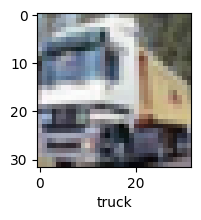

In [14]:
plot_sample(X_train,y_train,1)

In [16]:
#normalize data
X_train = X_train/255
X_test = X_test/255

In [19]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ann.fit(X_train, y_train, epochs = 5)

/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.3051 - loss: 1.9353
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4189 - loss: 1.6462
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.4517 - loss: 1.5509
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4742 - loss: 1.4907
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.4907 - loss: 1.4379


In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.43      0.50      1000
           1       0.71      0.36      0.48      1000
           2       0.45      0.17      0.25      1000
           3       0.38      0.28      0.32      1000
           4       0.39      0.50      0.44      1000
           5       0.39      0.41      0.40      1000
           6       0.51      0.58      0.54      1000
           7       0.58      0.52      0.55      1000
           8       0.47      0.76      0.58      1000
           9       0.43      0.71      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [24]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

cnn.fit(X_train, y_train, epochs = 10)

/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2052 - loss: 2.1436
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3793 - loss: 1.7183
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4545 - loss: 1.5131
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5043 - loss: 1.3889
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5434 - loss: 1.2965
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5648 - loss: 1.2329
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5853 - loss: 1.1789
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6085 - loss: 1.1249
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6240 - loss: 1.0768
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6380 - loss: 1.0354


In [25]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6129 - loss: 1.1028


[1.1135793924331665, 0.6132000088691711]

In [30]:
yp = cnn.predict(X_test)
yp[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[1.31388148e-02, 3.13769240e-04, 6.71429113e-02, 5.40087461e-01,
        2.38146950e-02, 2.58625984e-01, 4.39219363e-02, 8.54615308e-03,
        4.27113958e-02, 1.69695029e-03],
       [1.08493485e-01, 9.69398096e-02, 1.09641318e-04, 6.90836305e-06,
        1.92156920e-04, 3.22035612e-06, 6.22204652e-07, 1.52855791e-05,
        7.70149946e-01, 2.40889881e-02],
       [4.16250713e-02, 7.49107823e-02, 1.66071544e-03, 2.64577731e-03,
        2.13035801e-03, 5.43530157e-04, 8.33491940e-05, 3.62513820e-03,
        7.72561550e-01, 1.00213818e-01],
       [4.59589183e-01, 1.71406176e-02, 1.19902547e-02, 8.72386503e-04,
        8.07374436e-03, 2.75598886e-05, 6.37366320e-05, 1.03443465e-03,
        4.97919440e-01, 3.28858662e-03],
       [1.12793699e-04, 9.04230983e-05, 1.77481323e-02, 1.68061201e-02,
        9.01855886e-01, 1.66467633e-02, 4.57074270e-02, 7.83803756e-04,
        1.70777275e-04, 7.79276597e-05]], dtype=float32)

In [31]:
y_classes = [np.argmax(element) for element in yp]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(8), np.int64(4)]

In [32]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)